# Benchmark Analysis
Benchmark data is found under /swann/benchmark

In [3]:
# Imports
import csv
import pandas as pd
import glob

In [4]:
# Helper functions

def csv_to_df(file: str):
    """ Takes in a benchmark file and returns as Pandas DataFrame """
    df = pd.read_csv(
        f'/swann/benchmark/{file}',
        header = 9
    )
    df.dropna(axis=1, inplace=True)
    return df

def get_benchmarks():
    """ Find all csv files in benchmark folder sorted by date """
    files = glob.glob('/swann/benchmark/*.csv')
    files.sort()
    return files

def filter_df_with_wildcard_name(df: pd.DataFrame, name: str):
    """
        Example:
            - name = "LoadDatasets"
        Will return rows where name is "*LoadDatasets*"
    """
    return df.loc[df['name'].str.contains(name)]

In [39]:
for bm in get_benchmarks():
    print(f'[+] {bm}')

[+] /swann/benchmark/benchmark-1677845278.csv


In [73]:
# Load benchmark that has loading / parsing of datasets of size XS and S
df_bm_loadparse = csv_to_df('benchmark-1677845278.csv')
df_bm_loadparse

,name,iterations,real_time,cpu_time,time_unit,input_size
0,LoadDatasets/100000,1,2602.41,2532.48,ms,100000
1,LoadDatasets/300000,1,7749.27,7604.63,ms,300000
2,ParseDatasets/100000,1,2538.79,2520.52,ms,100000
3,ParseDatasets/300000,1,7710.79,7691.85,ms,300000


In [79]:
df_load = filter_df_with_wildcard_name(df_bm_loadparse, "LoadDatasets")
df_load_0 = pd.DataFrame(data={
    "name": ["LoadDatasets/000000"],
    "iterations": [1],
    "real_time": [0],
    "cpu_time": [0],
    "time_unit": ["ms"],
    "input_size": [0]
})
df_load = pd.concat([df_load_0, df_load])
df_load

,name,iterations,real_time,cpu_time,time_unit,input_size
0,LoadDatasets/000000,1,0.00,0.00,ms,0
0,LoadDatasets/100000,1,2602.41,2532.48,ms,100000
1,LoadDatasets/300000,1,7749.27,7604.63,ms,300000


Text(0, 0.5, 'Time (ms)')

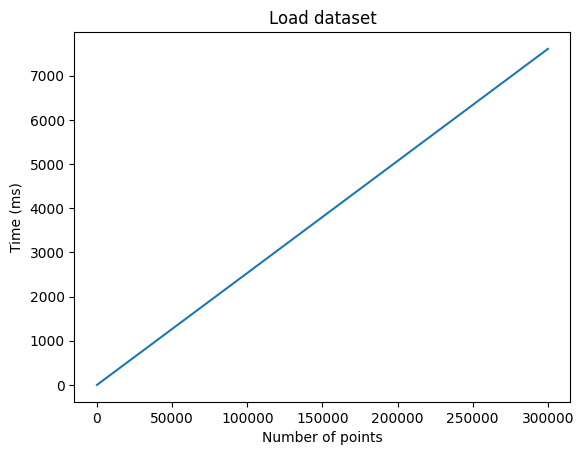

In [78]:
load_line = df_load.plot.line(title='Load dataset', x='input_size', y='cpu_time', legend=False)
load_line.set_xlabel("Number of points")
load_line.set_ylabel("Time (ms)")